In [16]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
import pickle
from astropy.timeseries import LombScargle
from astroquery.gaia import Gaia 
import random

### Crea dataframes con 1000 lc cada una

In [2]:
query = """
select top 1000 *
from gaiadr3.vari_eclipsing_binary
order by global_ranking desc
"""
job = Gaia.launch_job(query)
eclipsing_binaries = job.get_results().to_pandas("source_id")
eclipsing_binaries

,solution_id,global_ranking,reference_time,frequency,frequency_error,geom_model_reference_level,geom_model_reference_level_error,geom_model_gaussian1_phase,geom_model_gaussian1_phase_error,geom_model_gaussian1_sigma,...,derived_primary_ecl_duration,derived_primary_ecl_duration_error,derived_primary_ecl_depth,derived_primary_ecl_depth_error,derived_secondary_ecl_phase,derived_secondary_ecl_phase_error,derived_secondary_ecl_duration,derived_secondary_ecl_duration_error,derived_secondary_ecl_depth,derived_secondary_ecl_depth_error
source_id,,,,,,,,,,,,,,,,,,,,,
3129144706069228928,375316653866487564,0.842134,2219.870490,1.746188,0.000101,12.416936,0.000779,0.614713,0.000253,0.034432,...,0.192820,0.005068,2.849417,0.256233,0.854610,0.021769,0.175498,0.099257,0.004595,0.002166
4185297337638694528,375316653866487564,0.829747,2233.681253,0.533663,0.000050,12.848888,0.774666,0.896969,0.043398,0.608143,...,0.060728,0.000062,2.947855,0.007418,0.739599,0.034889,0.400000,0.000000,0.006954,0.003348
3326843532470471168,375316653866487564,0.819494,2274.619273,2.665704,0.000012,15.084185,0.000419,0.431179,0.000029,0.041335,...,0.231474,0.000171,5.082809,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
3342230338707766912,375316653866487564,0.817321,2256.612373,0.639434,0.000019,14.262313,0.000640,0.206075,0.001488,0.018492,...,0.103554,0.016111,0.587355,0.115889,0.709763,0.001984,0.096218,0.006379,0.555792,0.111453
4100457405574370176,375316653866487564,0.816518,2251.443895,2.455824,0.000001,15.797403,0.001802,0.260684,0.000340,0.047750,...,0.265190,0.007469,0.427325,0.001550,0.260684,0.000340,0.267400,0.007114,0.415430,0.003225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4089504581776077184,375316653866487564,0.741423,2338.822290,0.820153,0.000062,13.303427,0.002342,0.398455,0.003513,0.064633,...,0.361943,0.008620,2.871756,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
4123334978395465600,375316653866487564,0.741389,2422.836601,0.191683,0.000001,9.768657,0.000382,0.351676,0.000490,0.010298,...,0.057666,0.002406,0.720820,0.022005,0.852041,0.002053,0.068068,0.004611,0.569037,0.050276
3158679757353261696,375316653866487564,0.741377,2233.903812,0.384692,0.000006,12.971773,0.000531,0.207732,0.052288,0.037544,...,0.084058,0.000164,0.315792,0.000749,0.207732,0.052288,0.210249,0.160781,0.005730,0.003658


In [3]:
query = """
select top 1000 *
from gaiadr3.vari_rrlyrae
"""
job = Gaia.launch_job(query)
rr_lyraes = job.get_results().to_pandas("source_id")
rr_lyraes

,solution_id,pf,pf_error,p1_o,p1_o_error,epoch_g,epoch_g_error,epoch_bp,epoch_bp_error,epoch_rp,...,fund_freq1_harmonic_ampl_rp_error,fund_freq1_harmonic_phase_rp,fund_freq1_harmonic_phase_rp_error,fund_freq1_harmonic_ampl_rv,fund_freq1_harmonic_ampl_rv_error,fund_freq1_harmonic_phase_rv,fund_freq1_harmonic_phase_rv_error,best_classification,g_absorption,g_absorption_error
source_id,,,,,,,,,,,,,,,,,,,,,
244893954275107200,375316653866487565,NaN,NaN,0.264179,0.000005,1739.372653,0.000008,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RRc,NaN,NaN
245002531050576896,375316653866487565,0.520512,0.000006,NaN,NaN,1705.132336,0.000008,1705.141478,0.000010,1705.131147,...,"[0.010494326, 0.016995786, 0.016227422, 0.0126...","[1.1146808, 0.13735867, 5.741053, 5.4488583, 0...","[0.06407403, 0.13510026, 0.17668393, 0.3136657...",NaN,NaN,NaN,NaN,RRab,1.122552,0.077198
245251978451433728,375316653866487565,NaN,NaN,0.337184,0.000002,1705.474864,0.000002,1705.533958,0.000019,1705.482697,...,"[0.04082776, --, --, --, --, --, --, --, --, -...","[0.1899773, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.2747506, --, --, --, --, --, --, --, --, --...",NaN,NaN,NaN,NaN,RRc,NaN,NaN
245293416297967360,375316653866487565,NaN,NaN,0.347331,0.000012,1705.538768,0.000017,1705.496927,0.000097,1705.484195,...,"[0.015301226, --, --, --, --, --, --, --, --, ...","[5.972593, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.5786822, --, --, --, --, --, --, --, --, --...",NaN,NaN,NaN,NaN,RRc,NaN,NaN
245435906133523072,375316653866487565,NaN,NaN,0.325355,0.000016,1705.456119,0.000023,1705.367691,0.000031,1833.328871,...,"[0.10902919, --, --, --, --, --, --, --, --, -...","[4.8366456, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.730972, --, --, --, --, --, --, --, --, --,...",NaN,NaN,NaN,NaN,RRc,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4658077579447664640,375316653866487565,NaN,NaN,0.287554,0.000004,1695.178266,0.000006,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RRc,NaN,NaN
5251754141190869504,375316653866487565,NaN,NaN,0.281292,0.000003,1695.374732,0.000004,1695.386303,0.000011,1695.382988,...,"[0.013502558, --, --, --, --, --, --, --, --, ...","[2.2915726, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.406099, --, --, --, --, --, --, --, --, --,...",NaN,NaN,NaN,NaN,RRc,NaN,NaN
5251770560845547648,375316653866487565,NaN,NaN,0.329777,0.000007,1732.885574,0.000010,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RRc,NaN,NaN


In [4]:
query = """
select top 1000 *
from gaiadr3.vari_cepheid
"""
job = Gaia.launch_job(query)
cepheids = job.get_results().to_pandas("source_id")
cepheids

,solution_id,pf,pf_error,p1_o,p1_o_error,epoch_g,epoch_g_error,epoch_bp,epoch_bp_error,epoch_rp,...,fund_freq1_harmonic_ampl_rv,fund_freq1_harmonic_ampl_rv_error,fund_freq1_harmonic_phase_rv,fund_freq1_harmonic_phase_rv_error,p2_o,p2_o_error,type_best_classification,type2_best_sub_classification,mode_best_classification,multi_mode_best_classification
source_id,,,,,,,,,,,,,,,,,,,,,
4658032774371311104,375316653866487564,6.531933,0.000265,NaN,NaN,1678.187020,0.000375,1678.507516,0.003324,1678.172317,...,NaN,NaN,NaN,NaN,NaN,NaN,DCEP,,FUNDAMENTAL,
4658035626229427456,375316653866487564,NaN,NaN,1.178930,0.000019,1692.479882,0.000026,1692.401863,0.000190,1693.500893,...,NaN,NaN,NaN,NaN,NaN,NaN,DCEP,,FIRST_OVERTONE,
4658036274856153856,375316653866487564,NaN,NaN,2.138628,0.000052,1690.081822,0.000073,1690.082284,0.000145,1691.281922,...,NaN,NaN,NaN,NaN,NaN,NaN,DCEP,,FIRST_OVERTONE,
4658036828819820800,375316653866487564,NaN,NaN,2.659445,0.000040,1689.344297,0.000056,1689.299005,0.000076,1689.438656,...,NaN,NaN,NaN,NaN,NaN,NaN,DCEP,,FIRST_OVERTONE,
4658039710832195200,375316653866487564,2.911573,0.000092,NaN,NaN,1689.343821,0.000129,1689.367819,0.000097,1689.382354,...,NaN,NaN,NaN,NaN,NaN,NaN,DCEP,,FUNDAMENTAL,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5943320738591997440,375316653866487564,NaN,NaN,0.831591,0.000007,1706.844518,0.000010,1706.355266,0.000842,1706.885729,...,NaN,NaN,NaN,NaN,NaN,NaN,DCEP,,FIRST_OVERTONE,
5943385060029635328,375316653866487564,NaN,NaN,0.323661,0.000002,1707.526005,0.000002,1707.512358,0.000009,1707.577940,...,NaN,NaN,NaN,NaN,NaN,NaN,DCEP,,FIRST_OVERTONE,
5606634988063582848,375316653866487564,NaN,NaN,1.999369,0.000023,1757.650038,0.000032,1757.650334,0.000027,1757.652383,...,NaN,NaN,NaN,NaN,NaN,NaN,DCEP,,FIRST_OVERTONE,


### Crea carpeta dataset

In [ ]:
# Crear carpeta dataset
directory = "dataset"
parent_dir = "../"
path = os.path.join(parent_dir, directory)  
os.mkdir(path) 

### Crea carpetas por cada tipo

In [4]:
directories = ['ECL', 'RR', 'CEP']

In [8]:
# crea carpetas para cada directories
for directory in directories:
    parent_dir = "../dataset"
    path = os.path.join(parent_dir, directory)  
    os.mkdir(path)

### Guarda las lc por cada tipo en su carpeta

In [9]:
datalink = Gaia.load_data(ids=eclipsing_binaries.index, 
                        data_release='Gaia DR3', 
                        retrieval_type='EPOCH_PHOTOMETRY', 
                        format='csv', 
                        valid_data=False)

type(datalink), len(datalink)

(dict, 1000)

In [10]:
for key, value in datalink.items():
    lc = value[0].to_pandas()
    name = lc.source_id[0]
    lc.to_csv('../dataset/ECL/'+str(name)+'.csv')

In [11]:
datalink = Gaia.load_data(ids=rr_lyraes.index, 
                        data_release='Gaia DR3', 
                        retrieval_type='EPOCH_PHOTOMETRY', 
                        format='csv', 
                        valid_data=False)

type(datalink), len(datalink)

(dict, 1000)

In [12]:
for key, value in datalink.items():
    lc = value[0].to_pandas()
    name = lc.source_id[0]
    lc.to_csv('../dataset/RR/'+str(name)+'.csv')

In [13]:
datalink = Gaia.load_data(ids=cepheids.index, 
                        data_release='Gaia DR3', 
                        retrieval_type='EPOCH_PHOTOMETRY', 
                        format='csv', 
                        valid_data=False)

type(datalink), len(datalink)

(dict, 1000)

In [14]:
for key, value in datalink.items():
    lc = value[0].to_pandas()
    name = lc.source_id[0]
    lc.to_csv('../dataset/CEP/'+str(name)+'.csv')

### Crea un dataframe que tiene como indice el source_id de cada curva de luz y como columnas el periodo y tipo de cada estrella.

In [7]:
data_global = pd.DataFrame()
tablas = ["vari_eclipsing_binary","vari_rrlyrae","vari_cepheid"]
for star_type,tabla in zip(directories,tablas):
    ids_stars = []
    for lc_id in os.listdir(os.path.join("..","..","dataset",star_type)):
        ids_stars.append(lc_id[:-4])
    ids_stars = tuple(ids_stars)
    if star_type == "ECL":
        query = f"""
            select source_id,frequency
            from gaiadr3.{tabla}
            where source_id IN {ids_stars}
        """
        job = Gaia.launch_job(query)
        info_star_type = job.get_results().to_pandas("source_id")
        info_star_type["frequency"] = 1/info_star_type["frequency"]
        info_star_type = info_star_type.rename(columns= {"frequency":"pf"})
    else:
        query = f"""
            select source_id,pf
            from gaiadr3.{tabla}
            where source_id IN {ids_stars}
        """
        job = Gaia.launch_job(query)
        info_star_type = job.get_results().to_pandas("source_id")
    info_star_type["type"] = star_type
    data_global = pd.concat([data_global,info_star_type])

In [8]:
data_global

,pf,type
source_id,,
30259178472081408,0.900459,ECL
46008479948911360,0.590689,ECL
60393566669599744,0.609095,ECL
130944967216353536,3.021296,ECL
141075008362446080,0.479051,ECL
...,...,...
6716879292429356928,3.336294,CEP
6734274043115986176,8.592703,CEP
6734367261085169408,14.073005,CEP


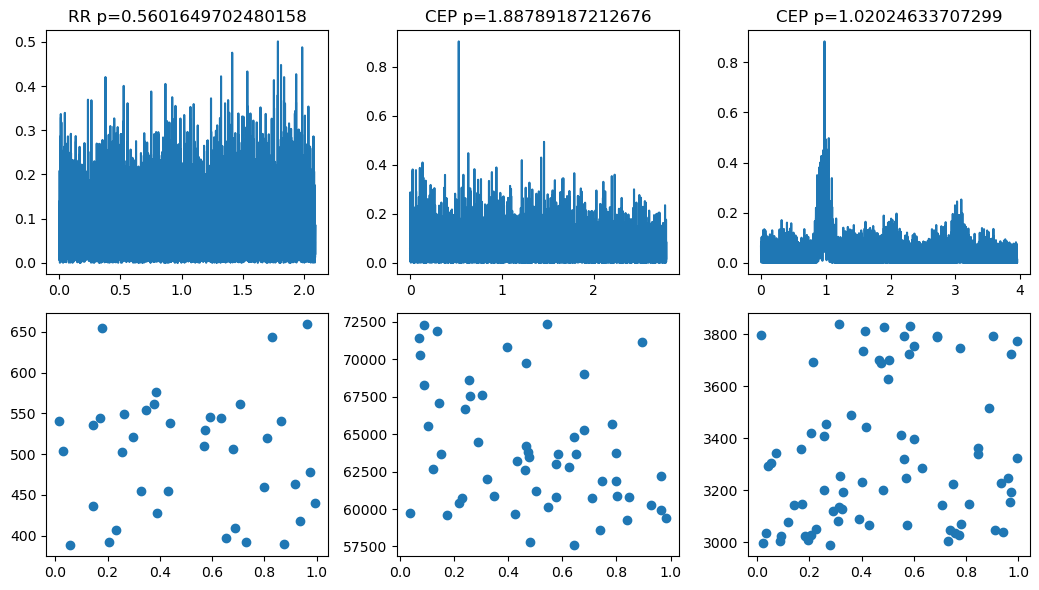

In [130]:
idx_stars = random.sample(range(0,data_global.shape[0]),25)
df_random = data_global.iloc[idx_stars]
mask_per = df_random["pf"].isna()==True
sin_periodo = df_random[mask_per]
fig,ax = plt.subplots(2,sin_periodo.shape[0],figsize=(3.5*sin_periodo.shape[0],6),tight_layout=True)
for tipo,idx,ax_periodogramas,ax_lc in zip(sin_periodo["type"],sin_periodo.index,ax[0,:],ax[1,:]):
    path = os.path.join("..","..","dataset",tipo,str(idx)+".csv")
    lc = pd.read_csv(path)
    mask = lc["band"]=="G"
    mask2 = lc["rejected_by_variability"]==False
    mask3 = mask & mask2
    time,flux,err = lc.loc[mask3][["time","flux","flux_error"]].values.T
    frequency,power = LombScargle(time,flux,err).autopower(nyquist_factor=100)
    period = 1./frequency[np.argmax(power)]
    ax_periodogramas.plot(frequency,power)
    ax_periodogramas.set_title(tipo + " p=" + str(period))
    phase = np.mod(flux,period)/period
    ax_lc.scatter(phase,flux)
    

In [143]:
random.sample(range(0,25),7)

[8, 4, 23, 12, 24, 22, 10]

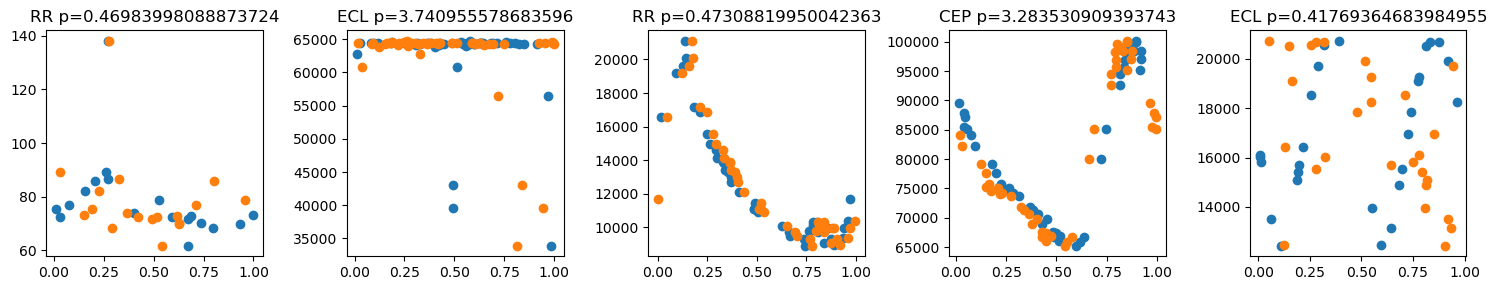

In [148]:
con_periodo = df_random[~mask_per]
con_periodo = con_periodo.iloc[random.sample(range(0,con_periodo.shape[0]),5)]
fig,ax = plt.subplots(1,5,figsize=(15,3),tight_layout=True)
for tipo,idx,period,ax_ in zip(con_periodo["type"],con_periodo.index,con_periodo["pf"],ax):
    path = os.path.join("..","..","dataset",tipo,str(idx)+".csv")
    lc = pd.read_csv(path)
    mask = lc["band"]=="G"
    mask2 = lc["rejected_by_variability"]==False
    mask3 = mask & mask2
    time,flux,err = lc.loc[mask3][["time","flux","flux_error"]].values.T
    phase = np.mod(time,period)/period
    frequency,power = LombScargle(time,flux,err).autopower(nyquist_factor=100)
    period_gaia = 1./frequency[np.argmax(power)]
    phase_gaia = np.mod(time,period_gaia)/period_gaia
    ax_.scatter(phase,flux,label="gaia")
    ax_.scatter(phase_gaia,flux,label="astropy")
    ax_.set_title(tipo + " p=" +str(period))

## DATASET CON SOLO PERIODO DE GAIA

In [152]:
query = """
select top 1000 *
from gaiadr3.vari_eclipsing_binary
order by global_ranking desc
"""
job = Gaia.launch_job(query)
eclipsing_binaries = job.get_results().to_pandas("source_id")
datalink = Gaia.load_data(ids=eclipsing_binaries.index, 
                        data_release='Gaia DR3', 
                        retrieval_type='EPOCH_PHOTOMETRY', 
                        format='csv', 
                        valid_data=False)

type(datalink), len(datalink)
for key, value in datalink.items():
    lc = value[0].to_pandas()
    name = lc.source_id[0]
    lc.to_csv(os.path.join("..","..","dataset_gaia","ECL",str(name)+'.csv'))

In [153]:
query = """
select top 1000 *
from gaiadr3.vari_rrlyrae
where pf IS NOT NULL
"""
job = Gaia.launch_job(query)
rr_lyraes = job.get_results().to_pandas("source_id")

datalink = Gaia.load_data(ids=rr_lyraes.index, 
                        data_release='Gaia DR3', 
                        retrieval_type='EPOCH_PHOTOMETRY', 
                        format='csv', 
                        valid_data=False)
for key, value in datalink.items():
    lc = value[0].to_pandas()
    name = lc.source_id[0]
    lc.to_csv(os.path.join("..","..","dataset_gaia","RR",str(name)+'.csv'))
    

In [154]:
query = """
select top 1000 *
from gaiadr3.vari_cepheid
where pf IS NOT NULL
"""
job = Gaia.launch_job(query)
cepheids = job.get_results().to_pandas("source_id")
datalink = Gaia.load_data(ids=cepheids.index, 
                        data_release='Gaia DR3', 
                        retrieval_type='EPOCH_PHOTOMETRY', 
                        format='csv', 
                        valid_data=False)
for key, value in datalink.items():
    lc = value[0].to_pandas()
    name = lc.source_id[0]
    lc.to_csv(os.path.join("..","..","dataset_gaia","CEP",str(name)+'.csv'))

In [163]:
df_global_period = pd.DataFrame()
path_ecl = os.path.join("..","..","dataset_gaia","ECL")
idx_ecl = tuple(map(lambda x : x[:-4],os.listdir(path_ecl)))

query = f"""
        select source_id,frequency
        from gaiadr3.vari_eclipsing_binary
        where source_id IN {idx_ecl}
    """
job = Gaia.launch_job(query)
info_star_type = job.get_results().to_pandas("source_id")
info_star_type["frequency"] = 1/info_star_type["frequency"]
info_star_type = info_star_type.rename(columns= {"frequency":"pf"})
info_star_type["type"] = "ECL"
df_global_period = pd.concat([df_global_period,info_star_type])
tablas_restantes = ["vari_rrlyrae","vari_cepheid"]
path_rr = os.path.join("..","..","dataset_gaia","RR")
path_cep = os.path.join("..","..","dataset_gaia","CEP")
idx_rr = tuple(map(lambda x : x[:-4],os.listdir(path_rr)))
idx_cep = tuple(map(lambda x : x[:-4],os.listdir(path_cep)))
for tabla,idx_type,type in zip(tablas_restantes,[idx_rr,idx_cep],["RR","CEP"]):
    query = f"""
        select source_id,pf
        from gaiadr3.{tabla}
        where source_id IN {idx_type}
    """
    job = Gaia.launch_job(query)
    info_star_type = job.get_results().to_pandas("source_id")
    info_star_type["type"] = type
    df_global_period = pd.concat([df_global_period,info_star_type])
df_global_period

,pf,type
source_id,,
30259178472081408,0.900459,ECL
46008479948911360,0.590689,ECL
60393566669599744,0.609095,ECL
130944967216353536,3.021296,ECL
141075008362446080,0.479051,ECL
...,...,...
6716879292429356928,3.336294,CEP
6734274043115986176,8.592703,CEP
6734367261085169408,14.073005,CEP


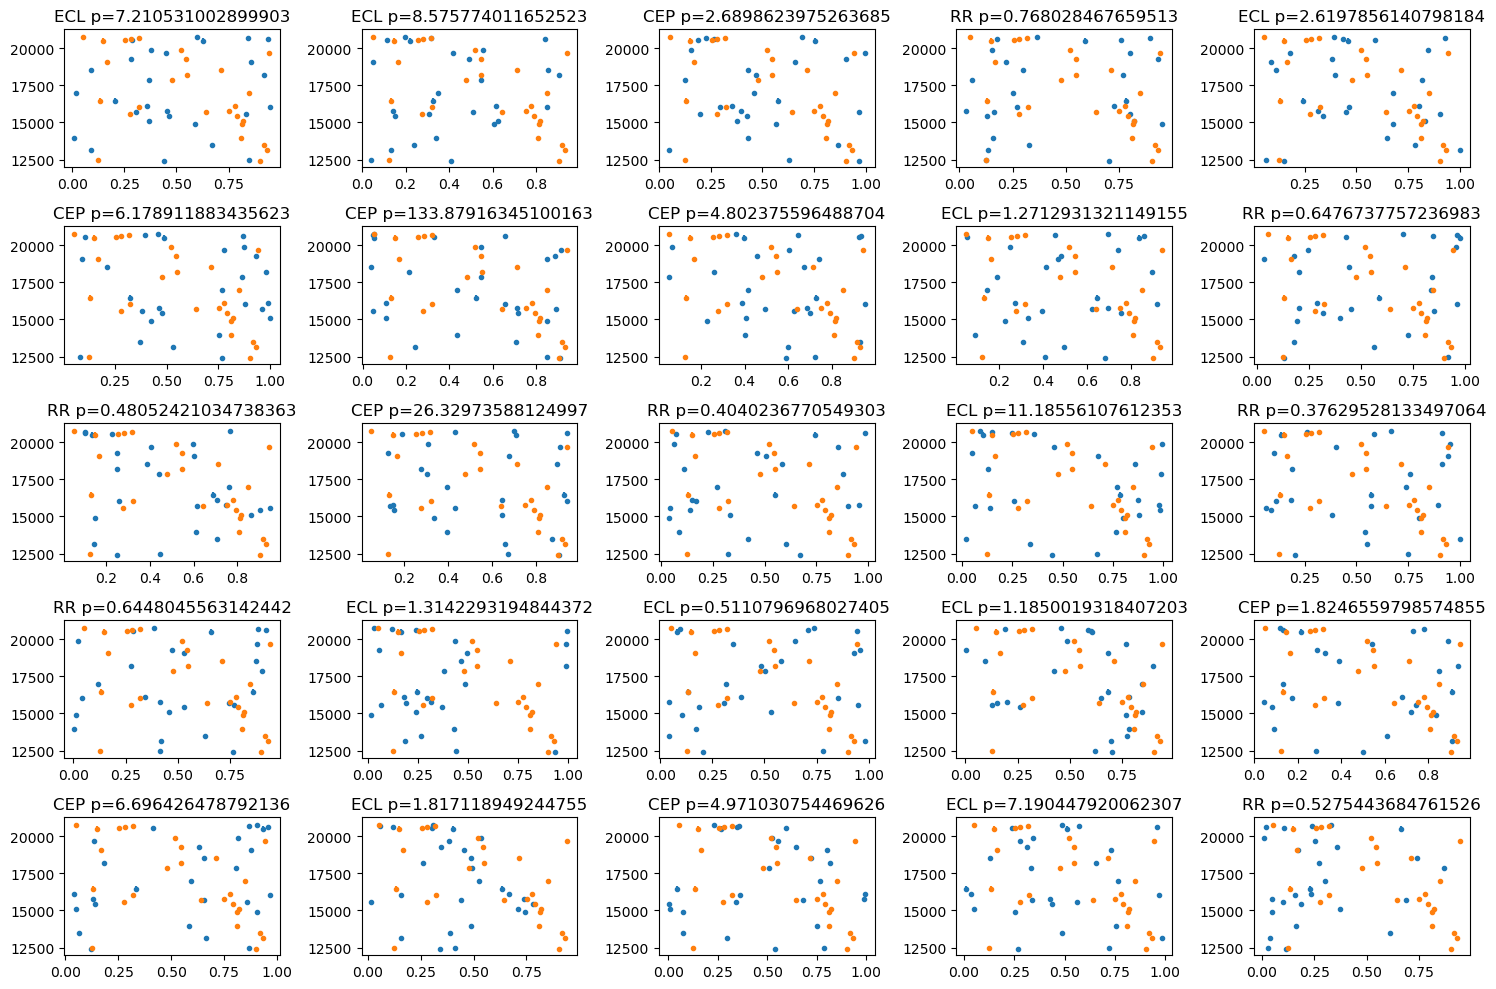

In [189]:
prueba_random = df_global_period.iloc[random.sample(range(0,df_global_period.shape[0]),25)]
fig,ax = plt.subplots(5,5,figsize=(15,10),tight_layout=True)
for tipo,periodo,idx,ax_ in zip(prueba_random["type"],prueba_random["pf"],prueba_random.index,ax.ravel()):
    lc = pd.read_csv(os.path.join("..","..","dataset_gaia",tipo,str(idx)+".csv"))
    lc = pd.read_csv(path)
    mask = lc["band"]=="G"
    mask2 = lc["rejected_by_variability"]==False
    mask3 = mask & mask2
    time,flux,err = lc.loc[mask3][["time","flux","flux_error"]].values.T
    phase = np.mod(time,periodo)/periodo
    frequency,power = LombScargle(time,flux,err).autopower(nyquist_factor=100)
    period_astropy = 1./frequency[np.argmax(power)]
    phase_astropy = np.mod(time,period_astropy)/period_astropy
    ax_.errorbar(phase,flux,err,fmt=".")
    ax_.errorbar(phase_astropy,flux,err,fmt=".")
    ax_.set_title(tipo+" p="+str(periodo))